# 5.3 Natural language understanding with NLTK

## 5.3.1 Business understanding

## 5.3.2 Data loading

In [1]:
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
# nltk.download('inaugural')

In [3]:
from nltk.corpus import inaugural
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [4]:
len(inaugural.fileids())

58

## 5.3.3 Data understanding

In [5]:
cols = ['year','president name','president', 'speech text']
df_inaugural = pd.DataFrame(columns=cols)
df_inaugural

,year,president name,president,speech text


In [6]:
for i in inaugural.fileids():
    year = i[0:4]
    name = re.findall(r'\-(.*)\.',i)[0]
    president = year+name
    text = inaugural.raw(i)
    df_inaugural = df_inaugural.append({'year':year,'president name':name,'president':president,'speech text':text}, ignore_index=True)

df_inaugural.head()

,year,president name,president,speech text
0,1789,Washington,1789Washington,Fellow-Citizens of the Senate and of the House...
1,1793,Washington,1793Washington,"Fellow citizens, I am again called upon by the..."
2,1797,Adams,1797Adams,"When it was first perceived, in early times, t..."
3,1801,Jefferson,1801Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805,Jefferson,1805Jefferson,"Proceeding, fellow citizens, to that qualifica..."


In [7]:
df_inaugural['"America" count'] = df_inaugural['speech text'].apply(lambda x: x.count('America'))
df_inaugural['"we" count'] = df_inaugural['speech text'].apply(lambda x: x.count('we' or 'We'))
df_inaugural['"you" count'] = df_inaugural['speech text'].apply(lambda x: x.count('you' or 'You'))

df_inaugural.head()

,year,president name,president,speech text,"""America"" count","""we"" count","""you"" count"
0,1789,Washington,1789Washington,Fellow-Citizens of the Senate and of the House...,2,10,13
1,1793,Washington,1793Washington,"Fellow citizens, I am again called upon by the...",1,0,1
2,1797,Adams,1797Adams,"When it was first perceived, in early times, t...",8,23,1
3,1801,Jefferson,1801Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,0,18,14
4,1805,Jefferson,1805Jefferson,"Proceeding, fellow citizens, to that qualifica...",1,22,8


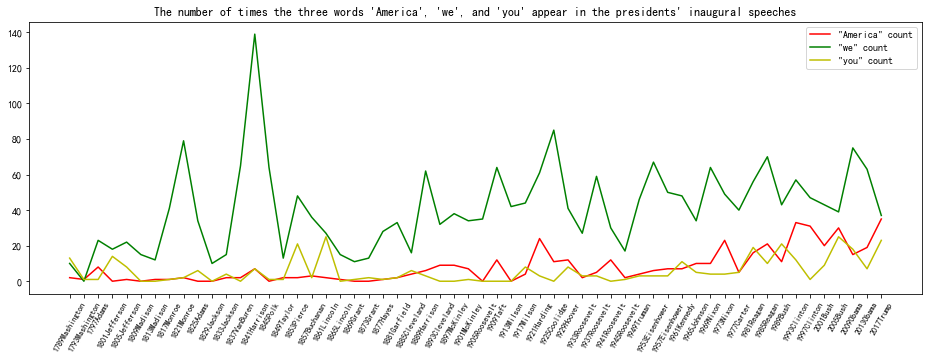

In [8]:
plt.rc('font',family='SimHei')
fig = plt.figure(figsize=(16,5))
plt.xticks(size = 8, rotation = 60)
           
plt.plot(df_inaugural['president'],df_inaugural['"America" count'],c='r',label='"America" count')
plt.plot(df_inaugural['president'],df_inaugural['"we" count'],c='g',label='"we" count')
plt.plot(df_inaugural['president'],df_inaugural['"you" count'],c='y',label='"you" count')

plt.legend()
plt.title("The number of times the three words 'America', 'we', and 'you' appear in the presidents' inaugural speeches")

plt.show()

In [9]:
df_inaugural['word count'] = df_inaugural['speech text'].apply(lambda x: len(str(x).split(" ")))
df_inaugural.head()

,year,president name,president,speech text,"""America"" count","""we"" count","""you"" count",word count
0,1789,Washington,1789Washington,Fellow-Citizens of the Senate and of the House...,2,10,13,1426
1,1793,Washington,1793Washington,"Fellow citizens, I am again called upon by the...",1,0,1,135
2,1797,Adams,1797Adams,"When it was first perceived, in early times, t...",8,23,1,2306
3,1801,Jefferson,1801Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,0,18,14,1725
4,1805,Jefferson,1805Jefferson,"Proceeding, fellow citizens, to that qualifica...",1,22,8,2153


Text(0.5, 1.0, "The number of words in the presidents' inaugural speeches")

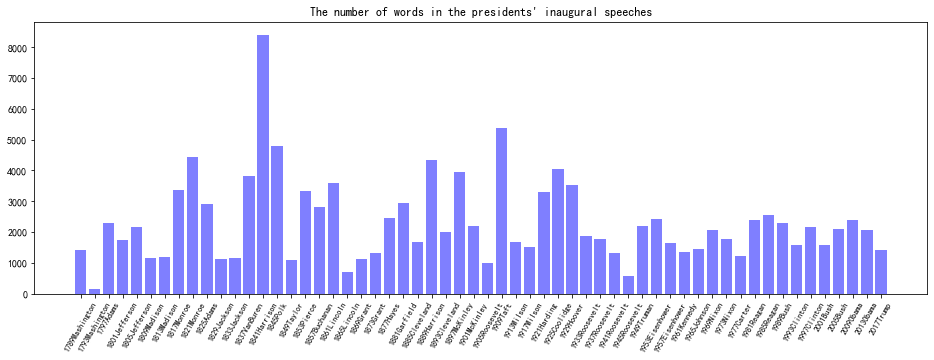

In [10]:
fig = plt.figure(figsize=(16,5))
plt.xticks(np.arange(len(df_inaugural['president'])), df_inaugural['president'],size = 8, rotation = 60)
plt.bar(np.arange(len(df_inaugural['word count'])),df_inaugural['word count'],color='blue', alpha=0.5)
plt.title("The number of words in the presidents' inaugural speeches")

In [11]:
from nltk.tokenize import sent_tokenize
df_inaugural['sentence count'] = df_inaugural['speech text'].apply(lambda x: len(sent_tokenize(x)))
df_inaugural.head()

,year,president name,president,speech text,"""America"" count","""we"" count","""you"" count",word count,sentence count
0,1789,Washington,1789Washington,Fellow-Citizens of the Senate and of the House...,2,10,13,1426,23
1,1793,Washington,1793Washington,"Fellow citizens, I am again called upon by the...",1,0,1,135,4
2,1797,Adams,1797Adams,"When it was first perceived, in early times, t...",8,23,1,2306,37
3,1801,Jefferson,1801Jefferson,Friends and Fellow Citizens:\n\nCalled upon to...,0,18,14,1725,41
4,1805,Jefferson,1805Jefferson,"Proceeding, fellow citizens, to that qualifica...",1,22,8,2153,45


Text(0.5, 1.0, "The number of sentences in the presidents' inaugural speeches")

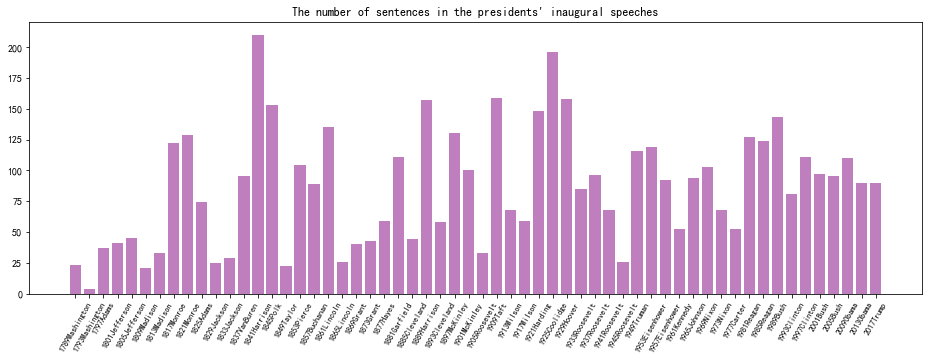

In [12]:
fig = plt.figure(figsize=(16,5))
plt.xticks(np.arange(len(df_inaugural['president'])), df_inaugural['president'],size = 8, rotation = 60)
plt.bar(np.arange(len(df_inaugural['sentence count'])),df_inaugural['sentence count'],color='purple', alpha=0.5)
plt.title("The number of sentences in the presidents' inaugural speeches")

In [13]:
president_speech = df_inaugural[df_inaugural['year'].isin(['2017','2009','2001','1993'])]
president_speech = president_speech.reset_index(drop=True)
president_speech

,year,president name,president,speech text,"""America"" count","""we"" count","""you"" count",word count,sentence count
0,1993,Clinton,1993Clinton,"My fellow citizens, today we celebrate the mys...",33,57,12,1583,81
1,2001,Bush,2001Bush,"President Clinton, distinguished guests and my...",20,43,9,1580,97
2,2009,Obama,2009Obama,My fellow citizens:\n\nI stand here today humb...,15,75,18,2383,110
3,2017,Trump,2017Trump,"Chief Justice Roberts, President Carter, Presi...",35,37,23,1425,90


## 5.3.4 Text normalization

In [14]:
president_speech['speech text'] = president_speech['speech text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
president_speech['speech text']

0    my fellow citizens, today we celebrate the mys...
1    president clinton, distinguished guests and my...
2    my fellow citizens: i stand here today humbled...
3    chief justice roberts, president carter, presi...
Name: speech text, dtype: object

In [15]:
president_speech['speech text'] =  president_speech['speech text'].str.replace('[^\w\s]','') 
president_speech['speech text']

0    my fellow citizens today we celebrate the myst...
1    president clinton distinguished guests and my ...
2    my fellow citizens i stand here today humbled ...
3    chief justice roberts president carter preside...
Name: speech text, dtype: object

## 5.3.5 Tokenization

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
president_speech['speech text'] = president_speech['speech text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
president_speech['speech text']

0    fellow citizens today celebrate mystery americ...
1    president clinton distinguished guests fellow ...
2    fellow citizens stand today humbled task us gr...
3    chief justice roberts president carter preside...
Name: speech text, dtype: object

In [17]:
add_stopwords = ['us','i','in','shall']
stop_words.extend(add_stopwords)
stop_words=set(stop_words)
president_speech['speech text'] = president_speech['speech text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
president_speech['speech text']

0    fellow citizens today celebrate mystery americ...
1    president clinton distinguished guests fellow ...
2    fellow citizens stand today humbled task grate...
3    chief justice roberts president carter preside...
Name: speech text, dtype: object

## 5.3.6 Extracting high frequency words

In [18]:
speech_1993Clinton = president_speech['speech text'][0]
freq_words_1993Clinton = pd.Series(speech_1993Clinton.split()).value_counts()[:5]

speech_2001Bush = president_speech['speech text'][1]
freq_words_2001Bush = pd.Series(speech_2001Bush.split()).value_counts()[:5]

speech_2009Obama = president_speech['speech text'][2]
freq_words_2009Obama = pd.Series(speech_2009Obama.split()).value_counts()[:5]

speech_2017Trump = president_speech['speech text'][3]
freq_words_2017Trump = pd.Series(speech_2017Trump.split()).value_counts()[:5]

In [19]:
freq_words_2017Trump

america     19
american    11
people      10
country      9
one          8
dtype: int64

<Figure size 1152x1152 with 0 Axes>

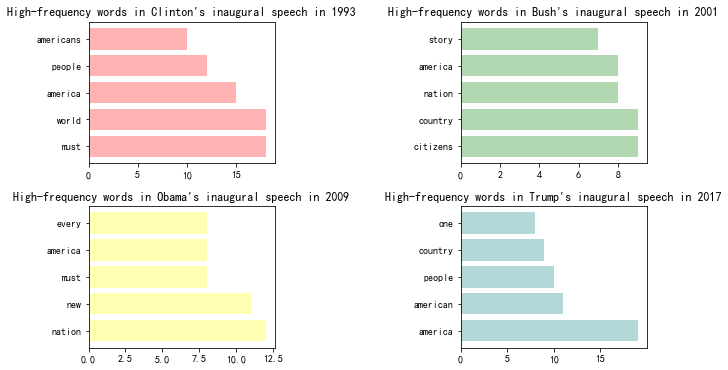

In [20]:
plt.figure(figsize=(16,16))

fig,ax = plt.subplots(2, 2, figsize=(10,6))
plt.subplots_adjust(wspace=1.0, hspace=0.3)

ax[0][0].barh(freq_words_1993Clinton.index, freq_words_1993Clinton, color='red', alpha=0.3)
ax[0][0].set_title("High-frequency words in Clinton's inaugural speech in 1993")

ax[0][1].barh(freq_words_2001Bush.index, freq_words_2001Bush, color='green', alpha=0.3)
ax[0][1].set_title("High-frequency words in Bush's inaugural speech in 2001")

ax[1][0].barh(freq_words_2009Obama.index, freq_words_2009Obama, color='yellow', alpha=0.3)
ax[1][0].set_title("High-frequency words in Obama's inaugural speech in 2009")

ax[1][1].barh(freq_words_2017Trump.index, freq_words_2017Trump, color='teal', alpha=0.3)
ax[1][1].set_title("High-frequency words in Trump's inaugural speech in 2017")

plt.show()

## 5.3.7 Word cloud creation

Text(0.5, 1.0, "Word cloud of Clinton's inaugural speech in 1993")

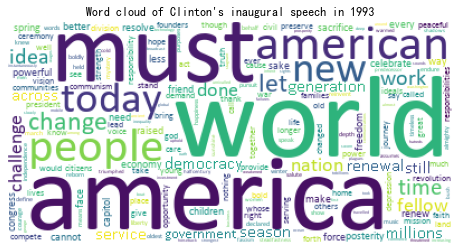

In [21]:
from wordcloud import WordCloud
word_cloud = WordCloud(font_path='calibri.ttf',  
                       background_color='white', 
                       stopwords=stop_words) 
word_cloud.generate(speech_1993Clinton)
plt.subplots(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word cloud of Clinton's inaugural speech in 1993")

Text(0.5, 1.0, "Word cloud of Bush's inaugural speech in 2001")

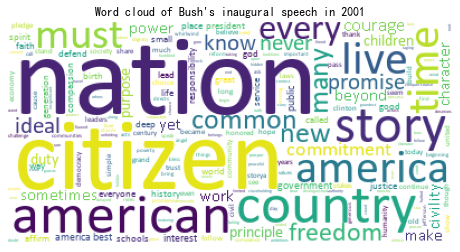

In [22]:
word_cloud.generate(speech_2001Bush)
plt.subplots(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word cloud of Bush's inaugural speech in 2001")

Text(0.5, 1.0, "Word cloud of Obama's inaugural speech in 2009")

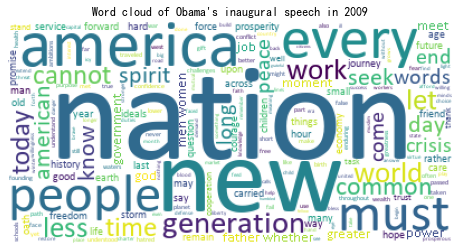

In [23]:
word_cloud.generate(speech_2009Obama)
plt.subplots(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word cloud of Obama's inaugural speech in 2009")

Text(0.5, 1.0, "Word cloud of Trump's inaugural speech in 2017")

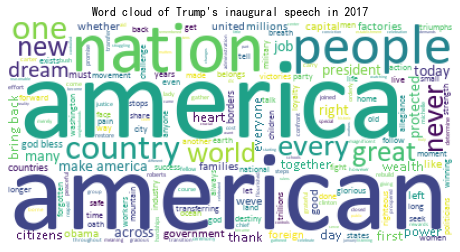

In [24]:
word_cloud.generate(speech_2017Trump)
plt.subplots(figsize=(8,5))
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Word cloud of Trump's inaugural speech in 2017")